In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
data = pd.read_csv("employee_attrition_dataset_dirty.csv")
data.head()

,emp_id,age,gender,department,experience,salary,overtime,satisfaction_score,attrition
0,1,38,Female,IT,13,33338.0,Yes,9.0,Yes
1,2,32,Male,HR,3,96289.0,No,9.0,No
2,3,51,Male,IT,1,91520.0,Yes,8.0,No
3,4,56,Male,Finance,9,38895.0,Yes,5.0,Yes
4,5,59,Female,HR,31,67910.0,Yes,3.0,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   emp_id              1005 non-null   int64  
 1   age                 1005 non-null   int64  
 2   gender              1005 non-null   object 
 3   department          1005 non-null   object 
 4   experience          1005 non-null   int64  
 5   salary              979 non-null    float64
 6   overtime            1005 non-null   object 
 7   satisfaction_score  980 non-null    float64
 8   attrition           1005 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 70.8+ KB


In [4]:
data.isnull().sum()

emp_id                 0
age                    0
gender                 0
department             0
experience             0
salary                26
overtime               0
satisfaction_score    25
attrition              0
dtype: int64

In [5]:
data.describe()

,emp_id,age,experience,salary,satisfaction_score
count,1005.000000,1005.000000,1005.000000,9.790000e+02,980.000000
mean,501.068657,40.248756,17.128358,7.619542e+04,5.418367
std,288.355045,11.012208,9.530850,7.427524e+04,2.876141
min,1.000000,22.000000,1.000000,2.000500e+04,1.000000
25%,252.000000,31.000000,9.000000,4.257100e+04,3.000000
50%,502.000000,40.000000,17.000000,7.132200e+04,5.000000
75%,749.000000,50.000000,25.000000,9.750900e+04,8.000000
max,1000.000000,59.000000,34.000000,1.094490e+06,10.000000


In [6]:
data["salary"].fillna(data["salary"].mean())

0        33338.000000
1        96289.000000
2        91520.000000
3        38895.000000
4        67910.000000
            ...      
1000     35945.000000
1001     72275.000000
1002     76195.419816
1003     93202.000000
1004    118318.000000
Name: salary, Length: 1005, dtype: float64

In [7]:
data["satisfaction_score"].fillna(data["satisfaction_score"].mean())

0       9.0
1       9.0
2       8.0
3       5.0
4       3.0
       ... 
1000    2.0
1001    9.0
1002    4.0
1003    7.0
1004    3.0
Name: satisfaction_score, Length: 1005, dtype: float64

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["department"] = le.fit_transform(data["department"])
data["gender"] = le.fit_transform(data["gender"])

data["overtime"] = le.fit_transform(data["overtime"])

data["attrition"] = le.fit_transform(data["attrition"])


In [42]:
data.describe()

,emp_id,age,gender,department,experience,salary,overtime,satisfaction_score,attrition
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,9.790000e+02,1005.000000,980.000000,1005.000000
mean,501.068657,40.248756,0.518408,1.457711,17.128358,7.619542e+04,0.497512,5.418367,0.342289
std,288.355045,11.012208,0.499910,1.140286,9.530850,7.427524e+04,0.500243,2.876141,0.474712
min,1.000000,22.000000,0.000000,0.000000,1.000000,2.000500e+04,0.000000,1.000000,0.000000
25%,252.000000,31.000000,0.000000,0.000000,9.000000,4.257100e+04,0.000000,3.000000,0.000000
50%,502.000000,40.000000,1.000000,1.000000,17.000000,7.132200e+04,0.000000,5.000000,0.000000
75%,749.000000,50.000000,1.000000,3.000000,25.000000,9.750900e+04,1.000000,8.000000,1.000000
max,1000.000000,59.000000,1.000000,3.000000,34.000000,1.094490e+06,1.000000,10.000000,1.000000


In [43]:
data.head()

,emp_id,age,gender,department,experience,salary,overtime,satisfaction_score,attrition
0,1,38,0,2,13,33338.0,1,9.0,1
1,2,32,1,1,3,96289.0,0,9.0,0
2,3,51,1,2,1,91520.0,1,8.0,0
3,4,56,1,0,9,38895.0,1,5.0,1
4,5,59,0,1,31,67910.0,1,3.0,1


In [44]:
data.head()

,emp_id,age,gender,department,experience,salary,overtime,satisfaction_score,attrition
0,1,38,0,2,13,33338.0,1,9.0,1
1,2,32,1,1,3,96289.0,0,9.0,0
2,3,51,1,2,1,91520.0,1,8.0,0
3,4,56,1,0,9,38895.0,1,5.0,1
4,5,59,0,1,31,67910.0,1,3.0,1


In [45]:
data.corr()

,emp_id,age,gender,department,experience,salary,overtime,satisfaction_score,attrition
emp_id,1.000000,-0.029092,0.048569,0.035670,0.053028,0.000731,0.020795,0.008060,-0.015867
age,-0.029092,1.000000,0.024135,0.042322,-0.013790,0.040519,0.021086,0.010009,0.021421
gender,0.048569,0.024135,1.000000,-0.081192,0.005461,0.037298,-0.024710,-0.061261,-0.055957
department,0.035670,0.042322,-0.081192,1.000000,0.008794,0.034796,-0.017209,-0.001743,0.013887
experience,0.053028,-0.013790,0.005461,0.008794,1.000000,-0.015461,-0.037223,0.003956,0.043994
salary,0.000731,0.040519,0.037298,0.034796,-0.015461,1.000000,-0.071385,0.014347,-0.231658
overtime,0.020795,0.021086,-0.024710,-0.017209,-0.037223,-0.071385,1.000000,-0.021530,0.242662
satisfaction_score,0.008060,0.010009,-0.061261,-0.001743,0.003956,0.014347,-0.021530,1.000000,-0.297862
attrition,-0.015867,0.021421,-0.055957,0.013887,0.043994,-0.231658,0.242662,-0.297862,1.000000


<Axes: >

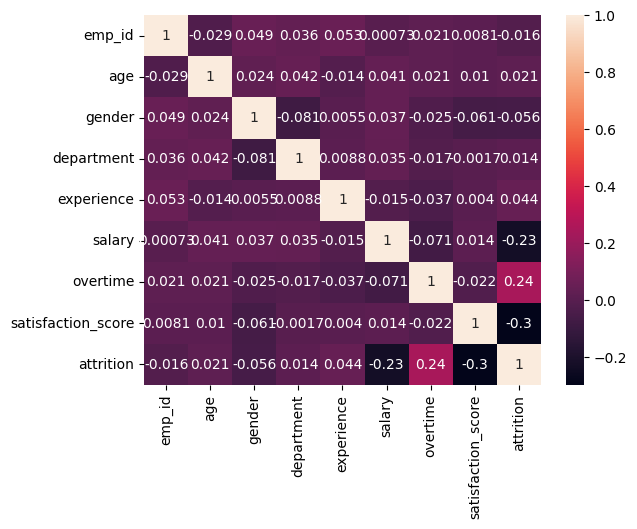

In [46]:
sns.heatmap(data.corr(),annot = True)

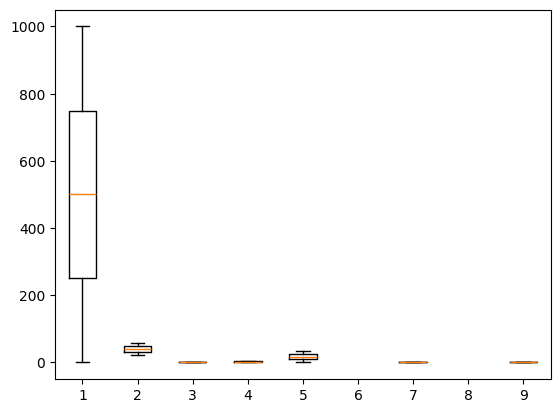

In [47]:
plt.boxplot(data)
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
X = data[["overtime","attrition"]]
y = data["attrition"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2 , random_state =42)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.2f}")


Logistic Regression: Accuracy = 1.00
Decision Tree Classifier: Accuracy = 1.00
Random Forest Classifier: Accuracy = 1.00


In [50]:
print("classification_report:",classification_report(y_test,y_pred))

classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00        77

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



In [51]:
print("confusion_matrix:",confusion_matrix(y_test,y_pred))

confusion_matrix: [[124   0]
 [  0  77]]
